In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("orvile/brain-cancer-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Henry\.cache\kagglehub\datasets\orvile\brain-cancer-mri-dataset\versions\2


In [2]:
import os

def found_files():
    print("="*80)
    label_name = []
    print(f"The first layer: {os.listdir(path)}")

    first_layer = os.listdir(path)[0]

    print(f"The second layer: {os.listdir(path+'\\'+first_layer)}")

    second_layer = os.listdir(path+'\\'+first_layer)[0]

    print(f"The third layer: {os.listdir(path+'\\'+first_layer+'\\'+second_layer)}")

    for label in os.listdir(path+'\\'+first_layer+'\\'+second_layer) :
        label_name.append(label)

    print(f"The label(s) founded: {label_name}")

    brain_glioma_path = path+'\\'+first_layer+'\\'+second_layer+'\\'+label_name[0]
    brain_menin_path = path+'\\'+first_layer+'\\'+second_layer+'\\'+label_name[1]
    brain_tumor_path = path+'\\'+first_layer+'\\'+second_layer+'\\'+label_name[2]

    print("="*80)

    print("Get the first file of the each label:")
    glioma_file = os.listdir(brain_glioma_path)[0]
    menin_file = os.listdir(brain_menin_path)[0]
    tumor_file = os.listdir(brain_tumor_path)[0]

    print(f"The first file of glioma: {glioma_file}")
    print(f"The first file of menin: {menin_file}")
    print(f"The first file of tumor: {tumor_file}")

    print("="*80)

    print("Get the final path:")

    brain_glioma_final_path = path+'\\'+first_layer+'\\'+second_layer+'\\'+label_name[0]+'\\'+glioma_file
    brain_menin_final_path = path+'\\'+first_layer+'\\'+second_layer+'\\'+label_name[1]+'\\'+menin_file
    brain_tumor_final_path = path+'\\'+first_layer+'\\'+second_layer+'\\'+label_name[2]+'\\'+tumor_file

    print(f"The final path of glioma: {brain_glioma_final_path}")
    print(f"The final path of menin: {brain_menin_final_path}")
    print(f"The final path of tumor: {brain_tumor_final_path}")

    return (brain_glioma_final_path, brain_menin_final_path, brain_tumor_final_path)

In [3]:
glioma_path, menin_path, tumor_path = found_files()

The first layer: ['Brain_Cancer raw MRI data', 'dataset.csv']
The second layer: ['Brain_Cancer']
The third layer: ['brain_glioma', 'brain_menin', 'brain_tumor']
The label(s) founded: ['brain_glioma', 'brain_menin', 'brain_tumor']
Get the first file of the each label:
The first file of glioma: brain_glioma_0001.jpg
The first file of menin: brain_menin_0001.jpg
The first file of tumor: brain_tumor_0001.jpg
Get the final path:
The final path of glioma: C:\Users\Henry\.cache\kagglehub\datasets\orvile\brain-cancer-mri-dataset\versions\2\Brain_Cancer raw MRI data\Brain_Cancer\brain_glioma\brain_glioma_0001.jpg
The final path of menin: C:\Users\Henry\.cache\kagglehub\datasets\orvile\brain-cancer-mri-dataset\versions\2\Brain_Cancer raw MRI data\Brain_Cancer\brain_menin\brain_menin_0001.jpg
The final path of tumor: C:\Users\Henry\.cache\kagglehub\datasets\orvile\brain-cancer-mri-dataset\versions\2\Brain_Cancer raw MRI data\Brain_Cancer\brain_tumor\brain_tumor_0001.jpg


---

# View Images

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import numpy as np
import seaborn as sns
import pandas as pd

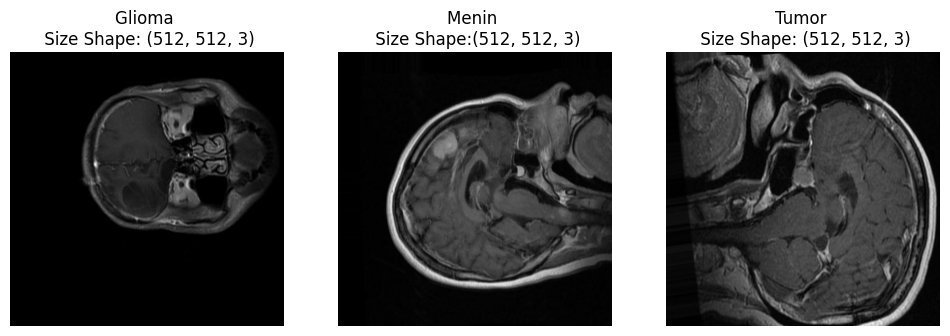

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

axs[0].imshow(imread(glioma_path))
axs[0].axis('off')
axs[0].set_title(f"Glioma \n Size Shape: {imread(glioma_path).shape}")

axs[1].imshow(imread(menin_path))
axs[1].axis('off')
axs[1].set_title(f"Menin \n Size Shape:{imread(menin_path).shape}")

axs[2].imshow(imread(tumor_path))
axs[2].axis('off')
axs[2].set_title(f"Tumor \n Size Shape: {imread(tumor_path).shape}")

plt.show()

# Size Image Analysis

In [6]:
# Será importante para o modelo, se todas as imagens estiverem com o mesmo tamanho

In [7]:
d1 = []
d2 = []
for image_glioma in os.listdir(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_glioma\\'):
    img_size = imread(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_glioma\\'+image_glioma)
    X, Y, _ = img_size.shape
    d1.append(X)
    d2.append(Y)
    
for image_menin in os.listdir(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_menin\\'):
    img_size = imread(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_menin\\'+image_menin)
    X, Y, _ = img_size.shape
    d1.append(X)
    d2.append(Y)

for image_tumor in os.listdir(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_tumor\\'):
    img_size = imread(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_tumor\\'+image_tumor)
    X, Y, _ = img_size.shape
    d1.append(X)
    d2.append(Y)

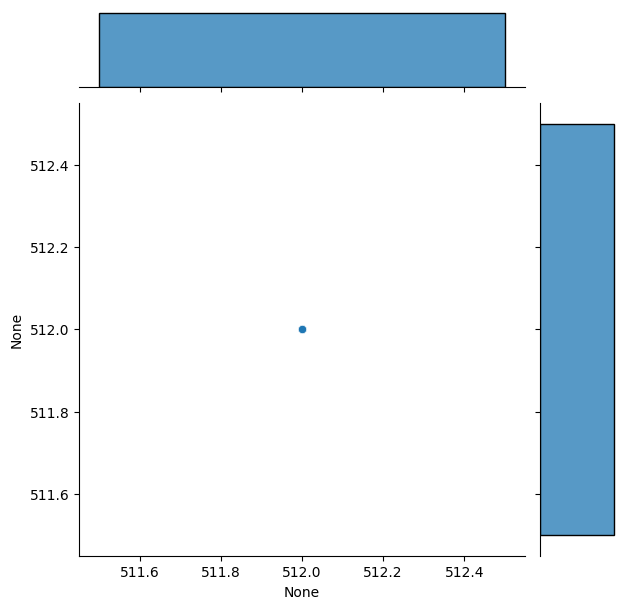

In [8]:
sns.jointplot(x=d1, y=d2)

In [9]:
np.mean(d1), np.mean(d2)

(512.0, 512.0)

In [10]:
# Default Shape
default_shape = (512, 512, 3)

# Count Images

In [11]:
glioma_count = 0
menin_count = 0
tumor_count = 0

for image_glioma in os.listdir(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_glioma\\'):
    img_size = imread(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_glioma\\'+image_glioma)
    glioma_count +=1
    
for image_menin in os.listdir(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_menin\\'):
    img_size = imread(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_menin\\'+image_menin)
    menin_count += 1
    
for image_tumor in os.listdir(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_tumor\\'):
    img_size = imread(path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\brain_tumor\\'+image_tumor)
    tumor_count += 1

print("Numbers of Glioma: " + str(glioma_count))
print("Numbers of Menin: " + str(menin_count))
print("Numbers of Tumor: " + str(tumor_count))

Numbers of Glioma: 2004
Numbers of Menin: 2004
Numbers of Tumor: 2048


# Data Augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Gerador para treino com data augmentation
image_gen = ImageDataGenerator(
    rescale=1./255,           # Normaliza os valores dos pixels para [0, 1]
    rotation_range=45,        # Rotação aleatória de até 45 graus
    width_shift_range=0.2,    # Deslocamento horizontal de até 20%
    height_shift_range=0.2,   # Deslocamento vertical de até 20%
    shear_range=0.2,          # Transformação de cisalhamento
    zoom_range=0.2,           # Zoom aleatório de até 20%
    horizontal_flip=True,     # Inversão horizontal
    validation_split=0.2      # 30% das imagens para validação
)

# Gerador separado para validação (sem augmentations, só rescale)
image_val = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [13]:
train_generator = image_gen.flow_from_directory(
    directory=path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\',
    target_size=default_shape[:2],
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=32, 
    subset='training',
    shuffle=True
)

Found 4847 images belonging to 3 classes.


In [14]:
validation_generator = image_val.flow_from_directory(
    directory=path+'\\Brain_Cancer raw MRI data\\Brain_Cancer\\',
    target_size=default_shape[:2],
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=32, 
    subset='validation',
    shuffle=False
)

Found 1209 images belonging to 3 classes.


In [15]:
train_files = set(train_generator.filenames)
val_files = set(validation_generator.filenames)

intersection = train_files.intersection(val_files)
print(f"Same images in train and validation?: {len(intersection)}")

Same images in train and validation?: 0


# Model

In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
default_shape

(512, 512, 3)

In [29]:
base_model = MobileNetV2(
    input_shape=default_shape,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Henry\AppData\Local\Temp\ipykernel_16404\3055055307.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 16, 16, 1280)        │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          81,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,340,163 (8.93 MB)

 Trainable params: 82,179 (321.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [31]:
early = EarlyStopping(monitor='val_loss', patience=2, mode='min')

In [32]:
train_generator.class_indices

{'brain_glioma': 0, 'brain_menin': 1, 'brain_tumor': 2}

In [34]:
model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early])

H:\Users\Henry\anaconda3\envs\huggingface\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 580s 4s/step - accuracy: 0.4260 - loss: 1.0928 - val_accuracy: 0.8031 - val_loss: 0.6533
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 492s 3s/step - accuracy: 0.7158 - loss: 0.6925 - val_accuracy: 0.8660 - val_loss: 0.4604
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 486s 3s/step - accuracy: 0.7763 - loss: 0.5560 - val_accuracy: 0.8693 - val_loss: 0.3911
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 480s 3s/step - accuracy: 0.8217 - loss: 0.4713 - val_accuracy: 0.8792 - val_loss: 0.3569
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 482s 3s/step - accuracy: 0.8426 - loss: 0.4258 - val_accuracy: 0.9032 - val_loss: 0.3088
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 486s 3s/step - accuracy: 0.8479 - loss: 0.4016 - val_accuracy: 0.8966 - val_loss: 0.2965
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 475s 3s/step - accuracy: 0.8534 - loss: 0.3809 - val_accuracy: 0.9115 - val_loss: 0.2738
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 476s 3s/step - accuracy: 0.8573 - loss: 0.3617 - val_accu

In [41]:
df_metrics = pd.DataFrame(model.history.history)

<Axes: >

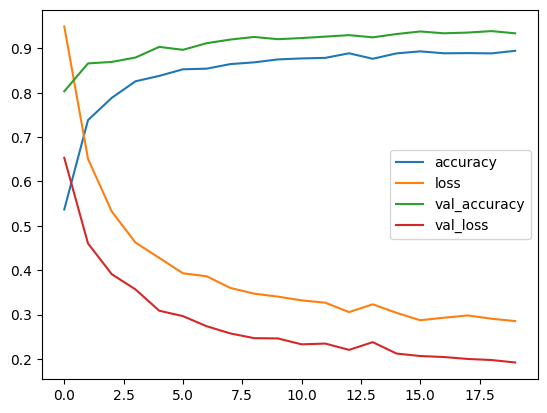

In [44]:
df_metrics.plot()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

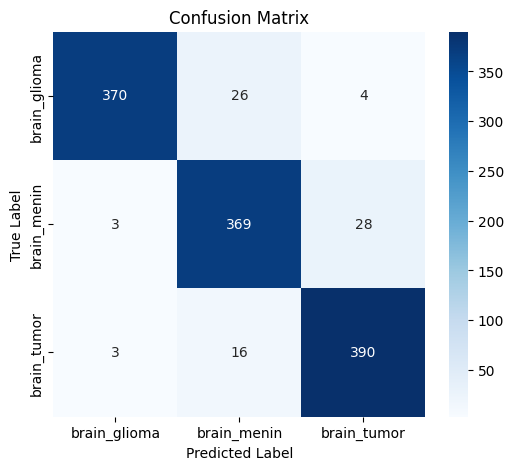

In [152]:
from sklearn.metrics import classification_report, confusion_matrix
# 1. Obter previsões e rótulos verdadeiros
y_pred = []
y_true = []

for images, labels in validation_generator:  # ou test_generator
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels, axis=1))
    
    if len(y_true) >= validation_generator.samples:
        break  # Evita loop infinito em generators

# 2. Converter para numpy
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# 3. Labels do dataset
class_names = list(validation_generator.class_indices.keys())

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 5. Confusion Matrix (gráfico)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- O modelo ainda é sujeito a melhoria, ajustando as camadas e aumentando número de épocas

In [145]:
from tensorflow.keras.models import save_model, load_model

In [146]:
save_model(model, filepath='Models/brain_tumor.keras')

In [147]:
# load_model
model_tumor = load_model(filepath='Models/brain_tumor.keras')

In [148]:
from pathlib import Path
from matplotlib.pyplot import imshow, title, show
from skimage.io import imread

def test_model(i):
    brain_type = ['brain_glioma', 'brain_menin', 'brain_tumor']
    brain_index = int(input("Type a 0 - Glioma, 1 - Menin, 2 - Tumor: "))

    list_images = os.listdir(path + f'\\Brain_Cancer raw MRI data\\Brain_Cancer\\{brain_type[brain_index]}\\')
    img = imread(path + f'\\Brain_Cancer raw MRI data\\Brain_Cancer\\{brain_type[brain_index]}\\{list_images[i]}')

    img = img / 255.0
    img_reshaped = img.reshape(1, 512, 512, 3)

    probs = model_tumor.predict(img_reshaped)[0]  # Pegamos só a primeira (e única) previsão do batch
    predict = np.argmax(probs)

    print(f"\n🔍 Probabilidades para cada classe:")
    for idx, prob in enumerate(probs):
        print(f"{brain_type[idx]}: {prob:.4f}")

    print(f"\n✅ Classe prevista: {brain_type[predict]} (confiança: {probs[predict]:.2%})")

    plt.imshow(img)
    plt.title(f"True Label: {brain_type[brain_index]}\nPredicted: {brain_type[predict]}")
    plt.axis('off')
    plt.show()

Type a 0 - Glioma, 1 - Menin, 2 - Tumor:  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

🔍 Probabilidades para cada classe:
brain_glioma: 0.9889
brain_menin: 0.0034
brain_tumor: 0.0077

✅ Classe prevista: brain_glioma (confiança: 98.89%)


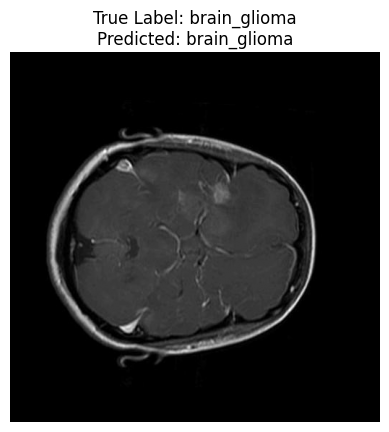

In [151]:
test_model(293)